# DFE parametrizations

The DFE needs to be parametrized in some way in order to be amenable to maximum likelihood estimation. {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default. Other parametrizations are also implemented (cf. {mod}`~fastdfe.parametrization`). You can also create your own parametrization by subclassing {class}`~fastdfe.parametrization.Parametrization`.

To see how the parametrization affects the shape of the DFE, we use our example data for `B. pendula`.

Bootstrapping: 100%|██████████| 100/100 [00:01<00:00, 72.28it/s]


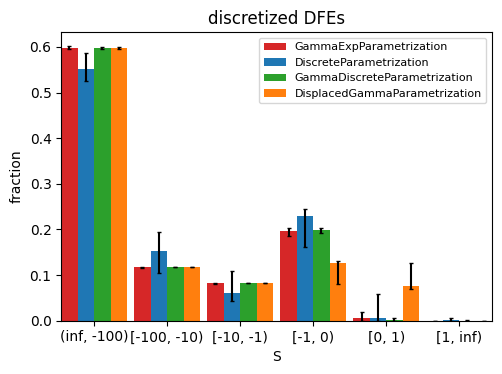

In [1]:
import logging

from fastdfe import BaseInference, Inference, Spectrum, GammaExpParametrization, DiscreteParametrization, \
    GammaDiscreteParametrization, DisplacedGammaParametrization

# set logging level to only show warnings
logging.getLogger('fastdfe').setLevel(logging.FATAL)

# the different DFE parametrizations
parametrizations = [
    GammaExpParametrization(),
    DiscreteParametrization(),
    GammaDiscreteParametrization(),
    DisplacedGammaParametrization()
]

inferences = []
for p in parametrizations:
    # create inference object
    inference = BaseInference(
        sfs_neut=Spectrum([177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652]),
        sfs_sel=Spectrum([797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 794]),
        model=p,
        do_bootstrap=True
    )

    # run inference
    inference.run()

    inferences.append(inference)

# plot the inferred DFEs
Inference.plot_discretized(
    inferences=inferences,
    labels=[p.__class__.__name__ for p in parametrizations]
);

The shape is rather similar overall, but {class}`~fastdfe.parametrization.GammaExpParametrization` appears to have larger confidence intervals.